In [33]:
import pandas as pd
import numpy as np
import nltk

In [34]:
pd.set_option('display.max_columns', None) 
#pd.reset_option('display.max_columns')

In [232]:
df_2013 = pd.read_excel("fy_2013_incidents_public_release_1-4-2018_tls_1.xlsx", header=1)
#df_2013.head()

In [233]:
yearly_df = pd.read_csv("Yearly Incidents.csv")
yearly_df.head()


,Stats,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Fatalities,4,1,1,2,1,1,6,6,2,1
1,Injuries,310,280,290,174,191,171,222,160,164,199
2,Lifting,165,177,138,110,123,111,169,274,259,333
3,Fires,109,121,92,82,86,77,84,87,117,126
4,Explosions,1,4,2,0,3,3,4,1,4,1


In [234]:
fatalities_df

,Stats,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Fatalities,4,1,1,2,1,1,6,6,2,1


In [246]:
# Filter the DataFrame to get only the rows where "Stats" is "Fatalities"
fatalities_df = yearly_df[yearly_df["Stats"] == "Fatalities"]

fatalities_df[['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022']].sum(axis=1)

0    25
dtype: int64

In [247]:
fatalities_df

,Stats,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Fatalities,4,1,1,2,1,1,6,6,2,1


In [278]:
df = pd.read_csv("TRY3Full2013_2022Data.csv")
df.head()

,date,time,company name,district (2010),panel,ocs region,district name,area name,block,lease,water depth (feet),distance to shore (miles),structure name,structure type,rig name,rig type,pipeline segment number,incident summary,number fatalities,number injury > 3 days lost time,number injury > 3 days restricted work/job transfer,number injury 1-3 days lost time,number injury 1-3 days restricted work/job transfer,number of injury no lost time,explosion,fire,loss of well control (underground),loss of well control (surface),loss of well control (diverter),loss of well control (equipment failure/improper procedure),major collision (property damage > $25k),minor collision (property damage < S25k),crane,other lifting device,other lifting device name,reportable h2s release,shut down gas release,required muster,exploration,development production,drilling,workover,completion,motor vessel,pipeline,helicopter,other,other operation description,equipment failure,human error,slip trip fall,weather,external damage,leak,upset h2o,overboard fluid,other cause,other cause description,year
0,41183,1300.0,Shell Offshore Inc.,N,NaN,Gulf of Mexico,Houma,WALKER RIDGE 60,95,G31943,NaN,NaN,NaN,NaN,NOBLE GLOBETROTTER,Drillship,NaN,While using a hammer to remove a tong die from...,NaN,NaN,NaN,NaN,NaN,1.0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN,2013
1,41184,2000.0,Stone Energy Corporation,N,NaN,Gulf of Mexico,New Orleans,MAIN PASS AREA 17,288,G01665,420,35,A,Fixed Leg Platform,NaN,NaN,NaN,An individual was installing a man way cover b...,NaN,NaN,NaN,1.0,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,Y,Vessel Cleaning,N,N,N,N,N,N,N,N,N,NaN,2013
2,41184,1645.0,ATP Oil & Gas Corporation,N,NaN,Gulf of Mexico,New Orleans,MISSISSIPPI CANYON 60,711,G14016,3005,49,A (GOMEZ),Semi Submersible (Column Stabilized Unit) Floa...,NaN,NaN,NaN,An employee was cleaning the inside of the wel...,NaN,NaN,NaN,NaN,NaN,1.0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN,2013
3,41185,430.0,"Venoco, Inc.",N,NaN,Pacific,California,Los Angeles,6912,P00205,739,11,GAIL,Fixed Leg Platform,NaN,NaN,NaN,The GDE-701 gas detector head spiked to 20% LE...,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,Y,N,Y,N,N,N,N,N,N,N,NaN,Y,N,N,N,N,N,N,N,N,NaN,2013
4,41185,815.0,Shell Offshore Inc.,N,NaN,Gulf of Mexico,Houma,WALKER RIDGE 60,508,G17001,NaN,NaN,NaN,NaN,NOBLE DANNY ADKINS,DP Semisubmersible,NaN,The crew was in the process of changing out th...,NaN,NaN,NaN,NaN,NaN,1.0,N,N,N,N,N,N,N,N,N,Y,Chain Hoist,N,N,N,N,Y,Y,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN,2013


In [279]:
df.shape

(6144, 59)

In [280]:
# Clean the 'district name' column
# df["district name"] = df["district name"].astype(str).str.replace(" District", "")
# df.to_csv("TRY4Full2013_2022Data.csv")

In [285]:
df["district name"].value_counts()

district name
New Orleans              2177
Houma                    1927
Lafayette                 741
Lake Jackson              439
Lake Charles              330
California                267
Camarillo                  82
Houma District             41
New Orleans District       35
Lafayette District         13
Lake Charles District      10
Lake Jackson District       9
Anchorage                   3
Santa Maria                 3
California District         3
Santa Maria District        1
Name: count, dtype: int64

In [282]:
df.columns

Index(['date', 'time', 'company name', 'district (2010)', 'panel',
       'ocs region', 'district name', 'area name', 'block', 'lease',
       'water depth (feet)', 'distance to shore (miles)', 'structure name',
       'structure type', 'rig name', 'rig type', 'pipeline segment number',
       'incident summary', 'number fatalities',
       'number injury > 3 days lost time',
       'number injury > 3 days restricted work/job transfer',
       'number injury 1-3 days lost time',
       'number injury 1-3 days restricted work/job transfer',
       'number of injury no lost time', 'explosion', 'fire',
       'loss of well control (underground)', 'loss of well control (surface)',
       'loss of well control (diverter)',
       'loss of well control (equipment failure/improper procedure)',
       'major collision (property damage > $25k)',
       'minor collision (property damage < S25k)', 'crane',
       'other lifting device', 'other lifting device name',
       'reportable h2s release'

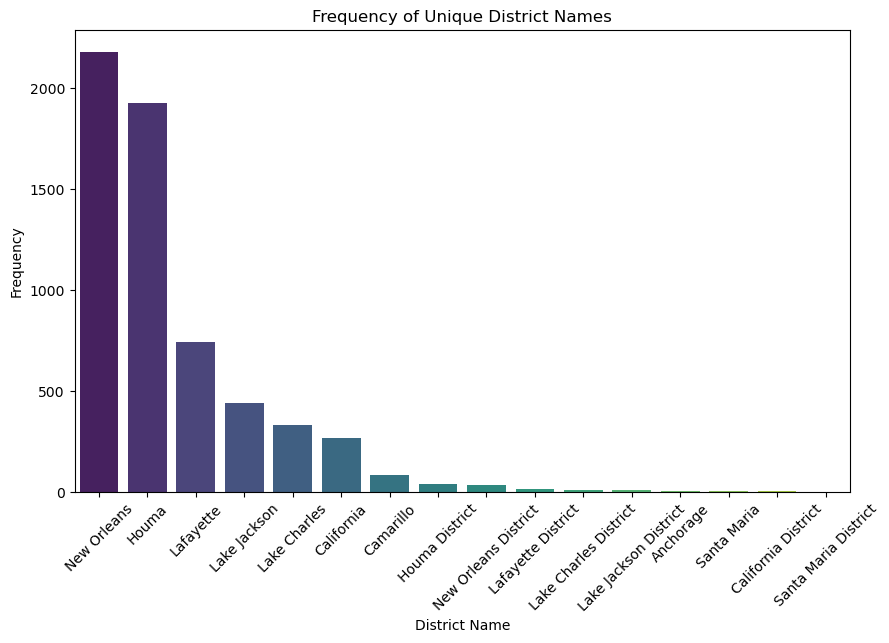

In [283]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Calculate the frequency of unique values in the "district name" column
district_name_counts = df['district name'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=district_name_counts.index, y=district_name_counts.values, palette='viridis')

# Customize the plot
plt.xlabel('District Name')
plt.ylabel('Frequency')
plt.title('Frequency of Unique District Names')
plt.xticks(rotation=45)
plt.show()


In [284]:
df["number fatalities"].value_counts()

number fatalities
0.0    2925
1.0      26
2.0       2
3.0       1
Name: count, dtype: int64

In [255]:
26 + (2*2) + (3*1)

33

In [256]:
# Equipment failure proportion
equipment_injury_proportion = np.mean(df["equipment failure"] == "Y")
print(equipment_injury_proportion)

# Human error proportion
human_error_proportion = np.mean(df["human error"] == "Y")
print(human_error_proportion)


0.052083333333333336
0.09114583333333333


In [257]:
# Using Chat GPT 
# My Prompt: df_2013["Incident Summary"] - use nlp libraries of python to get the 10 most frequent words

from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Combine all incident summaries into a single string
all_summaries = " ".join(df["incident summary"].astype(str).tolist())

# Tokenize the text
words = word_tokenize(all_summaries)

# Convert words to lower case and remove punctuation and stop words
words = [word.lower() for word in words if word.isalnum()]
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the 25 most common wordss
most_common_words = word_counts.most_common(50)

print(most_common_words)


[('ip', 5541), ('crane', 4866), ('fire', 3124), ('incident', 3028), ('deck', 2962), ('personnel', 2307), ('operator', 2305), ('platform', 2019), ('damage', 1878), ('gas', 1834), ('work', 1820), ('crew', 1610), ('load', 1601), ('time', 1544), ('area', 1484), ('line', 1474), ('approximately', 1459), ('back', 1411), ('pipe', 1402), ('evaluation', 1366), ('employee', 1362), ('rig', 1356), ('boat', 1345), ('2', 1299), ('facility', 1288), ('investigation', 1286), ('occurred', 1254), ('equipment', 1202), ('basket', 1202), ('sent', 1159), ('alarm', 1158), ('injuries', 1127), ('injured', 1123), ('causing', 1119), ('operations', 1117), ('well', 1114), ('vessel', 1099), ('one', 1073), ('boom', 1073), ('attached', 1073), ('1', 1036), ('lift', 1019), ('report', 992), ('hand', 975), ('water', 966), ('muster', 950), ('side', 913), ('valve', 899), ('made', 881), ('smoke', 875)]


In [258]:
df_2014 = pd.read_excel("fy2014_public_release_5-10-2017.xlsx", header=1)
df_2014.head()

,Date,Time,Company,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Incident Summary,Number Fatalities,Number Injury > 3 Days Lost Time,Number Injury > 3 Days Restricted Work/Job Transfer,Number Injury 1-3 Days Lost Time,Number Injury 1-3 Days Restricted Work/Job Transfer,Number of Injury No Lost Time,Fire/Explosion Category,Explosion,Fire,Loss of Well Control (Underground),Loss of Well Control (Surface),Loss of Well Control (Diverter),Loss of Well Control (Equipment failure/improper procedure),Major Collision (Property damage > $25K),Minor Collision (Property damage ≤ $25k),Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Required Muster,Exploration,Development Production,Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other,Other Operation Description,Equipment Failure,Human Error,Slip Trip Fall,Weather,External Damage,Leak,Upset H2O,Overboard Fluid,Other Cause,Other Cause Description
0,2013-10-09 00:00:00,730.0,"Energy XXI GOM, LLC",N,NaN,Gulf of Mexico,New Orleans,MAIN PASS AREA 17,107,G31435,61,17,D,Fixed Leg Platform,NaN,NaN,NaN,A helicopter departed for crew change with 4 p...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,Y,Helicopter crash,N,N,N,N,N,N,N,N,N,NaN
1,2014-05-17 00:00:00,830.0,Walter Oil & Gas Corporation,Y,N,Gulf of Mexico,Houma,SOUTH TIMBALIER AREA 17,285,G32224,375,55,NaN,NaN,ROWAN GORILLA IV,Jackup,NaN,"On May 17, 2014, while in the process of perfo...",NaN,2.0,NaN,NaN,NaN,1.0,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,Y,N,N,N,N,N,N,N,N,Y,P&A,N,Y,N,N,N,N,N,N,N,NaN
2,2014-07-07 00:00:00,1940.0,BP Exploration & Production Inc.,Y,N,Gulf of Mexico,New Orleans,MISSISSIPPI CANYON 60,776,G09866,5638,70,NaN,NaN,SEADRILL WEST VELA,Drillship,NaN,"On 7 July 2014, at approximately 1940 hours an...",NaN,2.0,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,Y,Handling Sub,N,N,N,N,Y,N,N,Y,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,Y,Unknown at this time
3,2013-11-02 00:00:00,1900.0,Anadarko Petroleum Corporation,N,N,Gulf of Mexico,Lake Jackson,EAST BREAKS 60,645,G32822,3798,95,NaN,NaN,ENSCO 8506,DP Semisubmersible,NaN,Two employees were in the derrick equalizing b...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,Y,N,N,N,N,N,N,NaN,N,Y,N,N,N,N,N,N,N,NaN
4,2014-05-06 00:00:00,1445.0,BP Exploration & Production Inc.,N,NaN,Gulf of Mexico,New Orleans,MISSISSIPPI CANYON 60,777,G09867,5720,65,NaN,NaN,SEADRILL WEST CAPRICORN,DP Semisubmersible,NaN,The IP was performing maintenance on the Port ...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,Y,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN


In [39]:
df_2015 = pd.read_excel("fy_2015_incidents_public_release_4-5-2017_tls.xlsx", header=1)
df_2015.head()

,Date,Time,Company,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Incident Summary,Number Fatalities,Number Injury > 3 Days Lost Time,Number Injury > 3 Days Restricted Work/Job Transfer,Number Injury 1-3 Days Lost Time,Number Injury 1-3 Days Restricted Work/Job Transfer,Number of Injury No lost Time,Fire Explosion Category,Explosion,Fire,Loss of Well Control (Underground),Loss of Well Control (Surface),Loss of Well Control (Diverter),Loss of Well Control (Equipment failure/improper procedure),Major Collision (Property damage >$25k),Minor Collision (Property damage ≤ $25k),Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Required Muster,Exploration,Development Production,Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other,Other Operation Description,Equipment Failure,Human Error,Slip Trip Fall,Weather,External Damage,Leak,Upset H2o,Overboard Fluid,Other Cause,Other Cause Description
0,2014-10-01 00:00:00,1700.0,Fieldwood Energy LLC,Y,N,Gulf of Mexico,Lafayette,Eugene Island Area 17,355,G19797,288.0,80.0,A,Well Protector,NaN,NaN,NaN,At approximately 17:00 hours on 1 October 2014...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,Y,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,Y,Abandonment,N,N,N,N,N,N,N,N,Y,Loss of vessel station keeping
1,2014-10-03 00:00:00,914.0,"LLOG Exploration Offshore, L.L.C.",N,NaN,Gulf of Mexico,New Orleans,Mississippi Canyon 60,547,G32334,3280.0,39.0,A- WHO DAT,Semisubmersible,NaN,NaN,NaN,While moving equipment around on SW corner of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,Y,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
2,2014-10-04 00:00:00,1930.0,Fieldwood Energy LLC,N,NaN,Gulf of Mexico,Houma,Ship Shoal Area 17,204,G01520,108.0,43.0,A-PRD,Fixed Leg Platform,NaN,NaN,NaN,Construction crew was installing new pipe to r...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,Y,Construction,N,N,N,N,N,N,N,N,N,NaN
3,2014-10-05 00:00:00,1700.0,Fieldwood Energy LLC,N,NaN,Gulf of Mexico,New Orleans,South Pass Area 17,87,G07799,390.0,13.0,D,Fixed Leg Platform,NaN,NaN,NaN,A crew was performing a hot work job on the to...,NaN,NaN,NaN,NaN,NaN,NaN,Incidental,N,Y,N,N,N,N,N,N,N,N,NaN,N,N,Y,N,Y,N,N,N,N,N,N,N,Y,P&A,N,N,N,N,N,N,N,N,N,NaN
4,2014-10-06 00:00:00,1632.0,Apache Deepwater LLC,N,NaN,Gulf of Mexico,New Orleans,Mississippi Canyon 60,674,G13687,2710.0,69.0,NaN,NaN,ENSCO 8505,DP Semisubmersible,NaN,Following the successful BOP testing (low/high...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,Y,N,Y,N,N,Y,N,N,N,N,Y,Permanent Abandonment of Well,N,N,N,N,N,N,N,N,N,NaN


In [40]:
df_2016 = pd.read_excel("fy_2016_incidents_public_release_4-5-2017_tls.xlsx", header=1)
df_2016.head()

,Date,Time,Company Name,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Incident Summary,Number Fatalities,Number Injury > 3 Days Lost Time,Number Injury > 3 Days Restricted Work/Job Transfer,Number Injury 1-3 Days Lost Time,Number Injury 1-3 Days Restricted Work/Job Transfer,Number of Injury No lost Time,Fire Explosion Category,Explosion,Fire,Loss of Well Control (Underground),Loss of Well Control (Surface),Loss of Well Control (Diverter),Loss of Well Control (Equipment failure/improper procedure),Major Collision (Property damage >$25k),Minor Collision (Property damage ≤ $25k),Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Required Muster,Exploration,Development Production,Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other,Other Operation Description,Equipment Failure,Human Error,Slip Trip Fall,Weather,External Damage,Leak,Upset H2o,Overboard Fluid,Other Cause,Other Cause Description
0,2015-10-01 00:00:00,336.0,BP Exploration & Production Inc.,N,NaN,Gulf of Mexico,New Orleans,Mississippi Canyon 60,383,G07937,4727.0,NaN,NaN,NaN,ENSCO DS-3,Drillship,NaN,Lines in mud pits were in process of being cle...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,Y,Y,N,N,Y,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
1,2015-10-01 00:00:00,1230.0,"Cobalt International Energy, L.P.",N,NaN,Gulf of Mexico,Lafayette,Garden Banks 60,958,G30876,4846.0,NaN,NaN,NaN,ROWAN RELIANCE,Drillship,NaN,While the aux hydra-racker was traveling to re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,Y,Hydraracker,N,N,N,Y,N,N,Y,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
2,2015-10-01 00:00:00,1240.0,"Black Elk Energy Offshore Operations, LLC",Y,N,Gulf of Mexico,Lake Jackson,High Island Are 42,A 442,G11383,172.0,80.0,A,Fixed Leg Platform,NaN,NaN,NaN,"On October 1, 2015 at approximately 1240 hours...",NaN,1.0,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,Y,Maintenance,N,Y,Y,N,N,N,N,N,N,NaN
3,2015-10-02 00:00:00,1500.0,"EPL Oil & Gas, Inc.",N,NaN,Gulf of Mexico,Houma,South Timbalier Area 17,200,G04464,131.0,41.0,A,Fixed Leg Platform,ROWAN GORILLA IV,Jackup,NaN,"While assisting a coworker roll up a 2.5"" hose...",NaN,NaN,1.0,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,Y,N,N,N,Y,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
4,2015-10-02 00:00:00,2025.0,GOM Shelf LLC,Y,N,Gulf of Mexico,Lake Jackson,Matagorda Island Area 42,685,G04548,95.0,18.0,B,Fixed Leg Platform,NONE RIG PA OPERATION (LJ),Non-Rig PA Operation,NaN,"On October 2, 2015, a flash fire occurred duri...",NaN,NaN,NaN,NaN,NaN,NaN,Incidental,N,Y,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,Y,Decommissioning,N,Y,N,N,N,N,N,N,N,NaN


In [109]:
df_2017_1 = pd.read_excel("fy2017_public_release_2-22-2018.xlsx", header=1)
df_2017_1.head()
df_2017_1.shape

(366, 60)

In [110]:
df_2017_2 = pd.read_excel("fy2017_public_release_2-22-2018.xlsx", header=1)
df_2017_2.head()
df_2017_2.shape

(366, 60)

In [43]:
df_2018 = pd.read_excel("cy2018-public-release-01-17-2020.xlsx", header=1)
df_2018.head()


,Date,Time,Operator Name,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Incident Summary,Number of Fatalities,Number Injuries >3 Days Lost Time,Number Injuries > 3 Days Restricted Work/Job Transfer,Number Injuries 1-3 Days Lost Time,Number Injuries 1-3 Days Restricted Work/Job Transfer,Number of Injuries No lost Time,Explosion,Fire,Loss of Well Control (Underground),Loss of Well Control (Surface),Loss of Well Control (Diverter),Loss of Well Control (Equipment failure/improper procedure),Major Collision (Property damage >$25k),Minor Collision (Property damage ≤ $25k),Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Required Muster,Exploration,Development Production,Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other Operation,Other Operation Description,Equipment Failure,Human Error,Slip Trip Fall,Weather,External Damage,Leak,Upset H2o,Overboard Fluid,Other Cause,Other Cause Description
0,2018-01-02 00:00:00,1620.0,Talos Petroleum LLC,N,NaN,Gulf of Mexico,Houma District,SHIP SHOAL AREA,114,00064,57.0,14.0,A-PRD,FIXED,NaN,NaN,NaN,There was a fire on the gas compressor that de...,NaN,NaN,NaN,NaN,NaN,NaN,N,Y,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
1,2018-01-08 00:00:00,1410.0,"Cox Operating, L.L.C.",N,NaN,Gulf of Mexico,Lake Charles District,VERMILION AREA,214,G02076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"On Monday afternoon, the SCADA system alarmed ...",NaN,NaN,NaN,NaN,NaN,NaN,N,Y,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
2,2018-01-09 00:00:00,1145.0,"Energy XXI GOM, LLC",N,NaN,Gulf of Mexico,New Orleans District,MAIN PASS AREA,73,G02947,146.0,8.0,A,FIXED,NaN,NaN,NaN,Sparks and smoke were witnessed coming from a ...,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
3,2018-01-09 00:00:00,620.0,Talos Energy Offshore LLC,N,NaN,Gulf of Mexico,New Orleans District,EWING BANK,305,G35292,275.0,32.0,A,FIXED,NaN,NaN,NaN,A crane mechanic was coming down from the sout...,NaN,NaN,NaN,NaN,1.0,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,Y,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
4,2018-01-11 00:00:00,520.0,Shell Offshore Inc.,N,NaN,Gulf of Mexico,Lake Jackson District,MINOS CANYON,728,G31195,8596.0,182.0,NaN,NaN,T.O. DEEPWATER PONTUS,Drillship,NaN,Final - While landing the final BOP test joint...,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,Y,N,NaN,N,N,N,Y,N,N,Y,N,N,N,N,N,N,NaN,Y,N,N,N,N,N,N,N,N,NaN


In [44]:
df_2019 = pd.read_excel("cy-2019-excel-spreadsheet.xlsx", header=1)
df_2019.head()

,Date,Time,Operator Name,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Incident Summary,Number of Fatalities,Number Injuries >3 Days LT,Number Injuries >3 Days RW,Number Injuries 1-3 Days LT,Number Injuries 1-3 Days RW,Number of Other Injuries,Explosion,Fire,LOST_WELL_CNTRL_UNDERGROUND_FL,LOST_WELL_CNTRL_SURFACE_FLAG,LOST_WELL_CNTRL_DIVERTER_FLAG,LOST_WELL_CNTRL_EQMT_FAIL_FL,MAJOR_REPORTABLE_COLLISION_FL,MINOR_REPORTABLE_COLLISION_FL,Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Required Muster,Exploration,Development Production,Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other Operation,Other Operation Description,Equipment Failure,Human Error,Slip Trip Fall,Weather,External Damage,Leak,Upset H2o,Overboard Fluid,Other Cause,Other Cause Description
0,2019-01-07,2300,BP Exploration & Production Inc.,N,NaN,Gulf of Mexico,New Orleans District,Mississippi Canyon,822,G14658,NaN,NaN,NaN,NaN,HELIX Q5000,Dp Semisubmersible,NaN,While installing handrails on top of the Expro...,0,0,0,1,0,0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,Y,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
1,2019-01-08,750,"Arena Offshore, LP",N,NaN,Gulf of Mexico,Houma District,South Timbalier Area,52,G01241,61.0,13.0,B-QTR,FIXED,NaN,NaN,NaN,While using a swing rope to transfer from the ...,0,1,0,0,0,0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
2,2019-01-08,37,Eni US Operating Co. Inc.,N,NaN,Gulf of Mexico,New Orleans District,Ewing Bank,921,G12142,1700.0,71.0,A-Morpeth East,MTLP,VALARIS 8505 (ENSCO 8505),Dp Semisubmersible,NaN,The crane was lowering the hose to the vessel ...,0,0,0,0,0,0,N,N,N,N,N,N,N,N,Y,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
3,2019-01-09,220,Talos ERT LLC,Y,N,Gulf of Mexico,Houma District,Green Canyon,282,G16727,2349.0,96.0,NaN,NaN,NOBLE DON TAYLOR,Drillship,NaN,"On January 9, 2019, an incident occurred on bo...",0,0,0,0,0,0,N,N,N,N,N,N,N,N,N,Y,hydraulic running tool,N,N,N,N,Y,N,Y,N,N,N,N,N,N,NaN,N,Y,N,N,N,N,N,N,N,NaN
4,2019-01-09,830,Walter Oil & Gas Corporation,N,NaN,Gulf of Mexico,New Orleans District,Ewing Bank,834,G27982,1186.0,NaN,A,FIXED,H&P 203,Platform,NaN,An employee and member of the crane / roustabo...,0,0,0,0,0,0,N,N,N,N,N,N,N,N,Y,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN


In [45]:
df_2020 = pd.read_excel("cy-2020-offshore-incident-statistics-excel-spreadsheet.xlsx", header=1)
df_2020.head()

,SN_EV_MASTERS,Date,Time,Operator Name,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Redacted Incident Summary,Operator Fatalities,Contractor Fatalities,Operator Number Injuries >3 Days LT,Contractor Number Injuries >3 Days LT,Operator Number Injuries 1-3 Days LT,Contractor Number Injuries 1-3 Days LT,Operator Number Injuries >3 Days RW,Contractor Number Injuries >3 Days RW,Operator Number Injuries 1-3 Days RW,Contractor Number Injuries 1-3 Days RW,Contractor Number of Other Injuries,Operator Number of Other Injuries,Explosion,Fire,Loss of Well Control Underground,Loss of Well Control Surface,Loss of Well Control Diverter,Loss of Well Control Equipment Failure,Major Collision,Minor Collision,Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Muster,Exploration,Development Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other Operation,Other Operation Description,Equipment Failure,Human Error,Slip Trip and Fall,Weather,External Damage,Leak,Upset H2O,Overboard Fluid,Other Cause,Other Cause Description
0,-25897,2020-01-03,1315,Anadarko Petroleum Corporation,N,N,Gulf of Mexico,Lake Jackson District,East Breaks,643,G09184,3650.0,113.0,A-Boomvang Spar,Spar Platform - Floating Production System,NaN,NaN,NaN,The PSLL for glycol pump tripped. Immediately ...,0,0,0,0,0,0,0,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,NaN,N,Y,Y,N,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
1,-25878,2020-01-04,930,Exxon Mobil Corporation,N,N,Gulf of Mexico,Lake Jackson District,Alaminos Canyon,25,G10380,4825.0,137.0,A-Hoover Spar,Spar Platform - Floating Production System,NaN,NaN,NaN,An employee was utilizing a needle gun to clea...,0,0,0,0,0,0,0,0,0,0,1,0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
2,-25909,2020-01-04,1325,Talos ERT LLC,N,N,Gulf of Mexico,Houma District,Green Canyon,237,G15563,2200.0,130.0,B(Helix),Mobile Production Unit,NaN,NaN,NaN,A surge protector that was used to power sever...,0,0,0,0,0,0,0,0,0,0,0,0,N,Y,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
3,-25881,2020-01-04,1430,Freeport-McMoRan Oil & Gas LLC,N,N,Pacific,California,Santa Maria,6374,NaN,242.0,5.0,IRENE,Fixed Leg Platform,NaN,NaN,NaN,Crane Operator was unloading Aqueo dive equipm...,0,0,0,0,0,0,0,0,0,0,0,0,N,N,N,N,N,N,N,N,Y,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
4,-25871,2020-01-05,900,"Castex Offshore, Inc.",N,N,Gulf of Mexico,Lake Charles District,West Cameron Area,96,G23740,42.0,14.0,B,Fixed Leg Platform,NaN,NaN,NaN,A pilot was making a post flight inspection wh...,0,0,0,0,0,1,0,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN


In [46]:
df_2021 = pd.read_excel("cy-2021-excel-spreadsheet.xlsx", header=1)
df_2021.head()

,SN_EV_MASTERS,Date,Time,Operator Name,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Incident Summary,Operator Fatalities,Contractor Fatalities,Operator Number Injuries >3 Days LT,Contractor Number Injuries >3 Days LT,Operator Number Injuries 1-3 Days LT,Contractor Number Injuries 1-3 Days LT,Operator Number Injuries >3 Days RW,Contractor Number Injuries >3 Days RW,Operator Number Injuries 1-3 Days RW,Contractor Number Injuries 1-3 Days RW,Contractor Number of Other Injuries,Operator Number of Other Injuries,Explosion,Fire,Loss of Well Control Underground,Loss of Well Control Surface,Loss of Well Control Diverter,Loss of Well Control Equipment Failure,Major Collision,Minor Collision,Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Muster,Exploration,Development Production,Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other Operation,Other Operation Description,Equipment Failure,Human Error,Slip Trip and Fall,Weather,External Damage,Leak,Upset H2O,Overboard Fluid,Other Cause,Other Cause Description
0,-30080,2021-01-01,857,BP Exploration & Production Inc.,N,NaN,Gulf of Mexico,Houma District,Green Canyon,743,NaN,NaN,NaN,NaN,NaN,ISLAND PERFORMER,Well Intervention Vessel,NaN,A member of the catering/steward staff discove...,0,0,0,0,0,0,0,0,0,0,0,0,N,Y,N,N,N,N,N,N,N,N,NaN,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,Vessel installing subsea kit,N,N,N,N,N,N,N,N,N,NaN
1,-30089,2021-01-02,855,Woodside Energy (GOM) Inc.,N,NaN,Gulf of Mexico,Houma District,Green Canyon,609,G16764,4293.0,116.0,NaN,NaN,T.O. DEEPWATER INVICTUS,Drillship,NaN,The cook smelled an unusual smell and saw a sm...,0,0,0,0,0,0,0,0,0,0,0,0,N,Y,N,N,N,N,N,N,N,N,NaN,N,N,N,Y,N,N,Y,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
2,-30112,2021-01-02,1300,Talos Petroleum LLC,N,NaN,Gulf of Mexico,Houma District,Ship Shoal Area,112,00066,45.0,14.0,V,FIXED,NaN,NaN,NaN,Operators observed a minor leak on the V-5 bon...,0,0,0,0,0,0,0,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,NaN,N,Y,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
3,-30081,2021-01-03,1515,BP Exploration & Production Inc.,N,NaN,Gulf of Mexico,Houma District,Green Canyon,787,NaN,7050.0,124.0,A (Atlantis),SEMI,NaN,NaN,NaN,"During weekly run of Emergency Generator, the ...",0,0,0,0,0,0,0,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
4,-30090,2021-01-04,1700,Anadarko Petroleum Corporation,N,NaN,Gulf of Mexico,Lake Jackson District,East Breaks,602,G14205,3675.0,142.0,A(NANSEN SPAR),SPAR,NaN,NaN,NaN,Personnel were in the process of raising the F...,0,0,0,0,0,0,0,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN


In [47]:
df_2022 = pd.read_excel("cy-2022-excel-spreadsheet.xlsx", header=1)
df_2022.head()

,SN_EV_MASTERS,Date,Time,Operator Name,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Incident Summary,Operator Fatalities,Contractor Fatalities,Operator Number Injuries >3 Days LT,Contractor Number Injuries >3 Days LT,Operator Number Injuries 1-3 Days LT,Contractor Number Injuries 1-3 Days LT,Operator Number Injuries >3 Days RW,Contractor Number Injuries >3 Days RW,Operator Number Injuries 1-3 Days RW,Contractor Number Injuries 1-3 Days RW,Contractor Number of Other Injuries,Operator Number of Other Injuries,Explosion,Fire,Loss of Well Control Underground,Loss of Well Control Surface,Loss of Well Control Diverter,Loss of Well Control Equipment Failure,Major Collision,Minor Collision,Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Muster,Exploration,Development Production,Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other Operation,Other Operation Description,Equipment Failure,Human Error,Slip Trip and Fall,Weather,External Damage,Leak,Upset H2O,Overboard Fluid,Other Cause,Other Cause Description
0,-32975.0,2022-01-01,1200.0,Exxon Mobil Corporation,N,NaN,Pacific,California District,South Marsh Island Area,6636,P00188,842.0,5.0,HONDO,FIXED,NaN,NaN,NaN,ExxonMobil employee was sent in on 1/1/2022 an...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
1,-32906.0,2022-01-02,2200.0,Shell Offshore Inc.,N,NaN,Gulf of Mexico,New Orleans District,Mississippi Canyon,809,G05868,3970.0,62.0,A-Ursa TLP,TLP,NaN,NaN,NaN,"While performing an intelatrac round, EE disco...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,N,N,N,N,N,N,N,N,NaN,N,Y,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
2,-32987.0,2022-01-03,15.0,"Renaissance Offshore, LLC",N,NaN,Gulf of Mexico,Houma District,Ship Shoal Area,219,G36942,112.0,38.0,A-CMP,FIXED,NaN,NaN,NaN,"Contractor Company: Renaissance Offshore, LLC\...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,Y,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
3,-32865.0,2022-01-03,448.0,Anadarko Petroleum Corporation,N,NaN,Gulf of Mexico,Lake Jackson District,Garden Banks,668,G17407,3150.0,154.0,A-Gunnison Spar,SPAR,NaN,NaN,NaN,"On 1/3/22, the fire alarm sounded and a full m...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
4,-32893.0,2022-01-04,1545.0,Anadarko Petroleum Corporation,N,NaN,Gulf of Mexico,Houma District,Green Canyon,645,G11081,4340.0,145.0,NaN,NaN,HOLSTEIN SPAR RIG,Platform,NaN,Crew was using the West Crane to move a round ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,N,N,N,N,N,N,Y,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,Y,5 Year Rig Certification,N,N,N,N,N,N,N,N,N,NaN


In [48]:
df_2021.columns

Index(['SN_EV_MASTERS', 'Date', 'Time', 'Operator Name', 'District (2010)',
       'Panel', 'OCS Region', 'District Name', 'Area Name', 'Block', 'Lease',
       'Water Depth (feet)', 'Distance to Shore (miles)', 'Structure Name',
       'Structure Type', 'Rig Name', 'Rig Type', 'Pipeline Segment Number',
       'Incident Summary', 'Operator Fatalities', 'Contractor Fatalities',
       'Operator Number Injuries >3 Days LT ',
       'Contractor Number Injuries >3 Days LT ',
       'Operator Number Injuries 1-3 Days LT',
       'Contractor Number Injuries 1-3 Days LT',
       'Operator Number Injuries >3 Days RW',
       'Contractor Number Injuries >3 Days RW',
       'Operator Number Injuries 1-3 Days RW',
       'Contractor Number Injuries 1-3 Days RW',
       'Contractor Number of Other Injuries',
       'Operator Number of Other Injuries', 'Explosion', 'Fire',
       'Loss of Well Control Underground', 'Loss of Well Control Surface',
       'Loss of Well Control Diverter',
       'Los